In [25]:
import pandas as pd
import glob
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns




In [26]:
dfs_dict = {}
for file in glob.glob('./data/*.bed'):
    dfs_dict[file.split(".")[1].split("/")[2]] = pd.read_csv(file, sep='\t')

In [27]:
merged_df = pd.DataFrame()
count = 0
for filename in dfs_dict:
    count = count + 1
    file1 =''
    if(count == 1):
        merged_df = dfs_dict[filename]
        file1 = "AF"+"_"+filename
        merged_df = merged_df.rename(columns={"AF": file1})
        merged_df["AF"] = ""
    else:
        if(count == 2):
            merged_df=pd.merge(merged_df, dfs_dict[filename]  , on = ['chr', 'start', 'end', 'ref', 'alt' ], suffixes=[file1, '_'+filename])
        else:
            merged_df=pd.merge(merged_df, dfs_dict[filename]  , on = ['chr', 'start', 'end', 'ref', 'alt' ], suffixes=['', '_'+filename])
    
        

In [28]:
numric_df = merged_df.loc[:, ~merged_df.columns.isin(['start', 'end', 'chr', 'end', 'ref', 'alt', 'AF'])]

In [30]:
mean_arr = numric_df.mean()
mean_dict = {}
for i in range(len(mean_arr)):
    tissue = mean_arr.index[i].split("_")[1]
    sample = mean_arr.index[i].split("_")[2]
    mean_value = mean_arr[i]
    if sample in mean_dict.keys():
        mean_dict[sample][tissue] = mean_value
    else:
        mean_dict[sample] = {}
        mean_dict[sample][tissue] = mean_value
        
    


In [31]:
mean_matrix = pd.DataFrame.from_dict(mean_dict)

In [32]:
mean_matrix

,sample006,sample001,sample002,sample007,sample005,sample004,sample003,sample009,sample010,sample008
tissue005,0.184375,0.190625,0.195893,0.192500,0.202679,0.200446,0.222411,0.204286,0.204375,0.220089
tissue003,0.516071,0.491964,0.516339,0.489107,0.496696,0.498125,0.501071,0.502054,0.478393,0.493571
tissue004,0.500089,0.504643,0.501875,0.497321,0.505446,0.497768,0.491250,0.505982,0.501607,0.491518
tissue001,0.720268,0.693661,0.687946,0.696429,0.704821,0.690536,0.718304,0.694732,0.697946,0.692232
tissue002,0.497054,0.503125,0.479554,0.512768,0.525268,0.501429,0.507589,0.503929,0.504732,0.479554


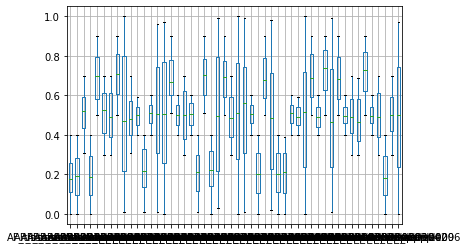

In [33]:
boxplot = numric_df.boxplot()

In [34]:
plt.show()

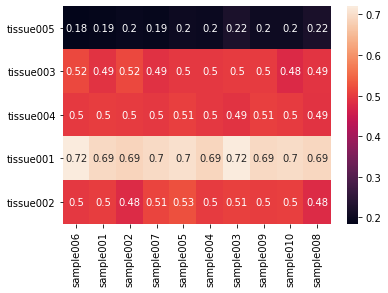

In [35]:
sns.heatmap(mean_matrix, annot=True)
plt.show()

## Ans 4.1 From heat map, it is clear that tissue 1 has on average highest AFs and tissue 5 on average have low AFs

In [36]:
from scipy.stats import ttest_ind
ttest_ind(mean_matrix.loc['tissue001'], mean_matrix.loc['tissue005'])

Ttest_indResult(statistic=94.99207416577323, pvalue=9.119166628913645e-26)

## Higher t score value shows that sample set are significantly different.  


50